<!-- Styling for the main heading -->
<h1 style="color: red; text-align: center;">Tactical Analysis by: The Modern Ball-Playing Goalkeeper: How André Onana Could Elevate Manchester United</h1>

<!-- Styling for the subheading -->
<h2 style="color: red; text-align: center;">Unlocking the Power of Passing: A Comprehensive PCA and Clustering Analysis of Goalkeeper Impact on Team Performance</h2>


### Importing required librarys

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('Top5leaguepassstats2021-22.csv')
df

,Rk,Player,Nation,Pos,Squad,league,Age,Born,90s,Total_Cmp,...,long_Cmp%,Assist,xAG,xA,A-xAG,KeyPass,1/3,PPA,CrsPA,PrgP
0,1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,21,2000,32.0,1107.0,...,35.6,2,1.7,1.7,0.3,20.0,50.0,37.0,9.0,117.0
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,33,1987,33.1,1284.0,...,54.5,0,0.8,0.6,-0.8,9.0,95.0,7.0,0.0,119.0
2,3,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21,2000,27.4,1535.0,...,83.7,0,0.9,0.8,-0.9,17.0,87.0,13.0,1.0,108.0
3,4,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,28,1993,32.8,1342.0,...,64.4,2,3.7,2.6,-1.7,35.0,147.0,23.0,9.0,171.0
4,5,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21,2000,0.5,3.0,...,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2916,Martin Ødegaard,no NOR,"MF,FW",Arsenal,eng Premier League,22,1998,30.9,1368.0,...,62.1,4,6.3,5.4,-2.3,77.0,113.0,71.0,3.0,224.0
2916,2917,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31,1990,24.1,407.0,...,75.0,4,3.3,3.0,0.7,33.0,19.0,5.0,1.0,35.0
2917,2918,Filip Đuričić,rs SRB,"MF,FW",Sassuolo,it Serie A,29,1992,7.5,179.0,...,100.0,1,1.6,1.8,-0.6,11.0,14.0,16.0,0.0,28.0
2918,2919,Blanco,NaN,MF,Real Madrid,es La Liga,21,2000,0.3,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rk             2920 non-null   int64  
 1   Player         2920 non-null   object 
 2   Nation         2917 non-null   object 
 3   Pos            2920 non-null   object 
 4   Squad          2920 non-null   object 
 5   league         2920 non-null   object 
 6   Age            2920 non-null   int64  
 7   Born           2920 non-null   int64  
 8   90s            2920 non-null   float64
 9   Total_Cmp      2915 non-null   float64
 10  Total_Att      2915 non-null   float64
 11  Total_Cmp%     2901 non-null   float64
 12  TotDist        2915 non-null   float64
 13  Total_PrgDist  2915 non-null   float64
 14  short_Cmp      2915 non-null   float64
 15  short_Att      2915 non-null   float64
 16  short_Cmp%     2866 non-null   float64
 17  medium_Cmp     2915 non-null   float64
 18  medium_A

### Taking club's league position from another data

In [4]:
standings=pd.read_excel('top5league_stats.xlsx')
standings=standings.iloc[126:224,:]
standings

,"Welcome, football fans from around the world!",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
126,1,Club Crest Manchester City,eng ENG,1,38,29,6,3,99,26,73,93,2.45,88.7,24.6,64,1.68,52774,Kevin De Bruyne - 15,Ederson
127,2,Club Crest Liverpool,eng ENG,2,38,28,8,2,94,26,68,92,2.42,88.7,33.8,54.9,1.45,53352,Mohamed Salah - 23,Alisson
128,3,Club Crest Bayern Munich,de GER,1,34,24,5,5,97,37,60,77,2.26,89,36.3,52.7,1.55,33176,Robert Lewandowski - 35,Manuel Neuer
129,4,Club Crest Paris S-G,fr FRA,1,38,26,8,4,90,36,54,86,2.26,76.7,39.8,36.9,0.97,41589,Kylian Mbappé - 28,Keylor Navas
130,5,Club Crest Real Madrid,es ESP,1,38,26,8,4,80,31,49,86,2.26,71.7,43.9,27.8,0.73,41235,Karim Benzema - 27,Thibaut Courtois
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,94,Club Crest Genoa,it ITA,19,38,4,16,18,27,60,-33,28,0.74,37.2,54.1,-16.9,-0.44,12326,Mattia Destro - 9,Salvatore Sirigu
220,95,Club Crest Venezia,it ITA,20,38,6,9,23,34,69,-35,27,0.71,36.5,71.8,-35.3,-0.93,6648,Thomas Henry - 9,Niki Mäenpää
221,96,Club Crest Watford,eng ENG,19,38,6,5,27,34,77,-43,23,0.61,40,64.5,-24.5,-0.64,20614,Emmanuel Dennis - 10,Ben Foster
222,97,Club Crest Norwich City,eng ENG,20,38,5,7,26,23,84,-61,22,0.58,32.3,75.5,-43.2,-1.14,26836,Teemu Pukki - 11,Tim Krul


In [5]:
data=standings.reset_index(drop=True)
l=['Rk','Squad','Country','LgRk','MP','W','D','L','GF','GA','GD','Pts','Pts/MP','xG','xGA','xGD','xGD/90','Attendance','Top Team Scorer','Goalkeeper']
data.columns=l
data

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
0,1,Club Crest Manchester City,eng ENG,1,38,29,6,3,99,26,73,93,2.45,88.7,24.6,64,1.68,52774,Kevin De Bruyne - 15,Ederson
1,2,Club Crest Liverpool,eng ENG,2,38,28,8,2,94,26,68,92,2.42,88.7,33.8,54.9,1.45,53352,Mohamed Salah - 23,Alisson
2,3,Club Crest Bayern Munich,de GER,1,34,24,5,5,97,37,60,77,2.26,89,36.3,52.7,1.55,33176,Robert Lewandowski - 35,Manuel Neuer
3,4,Club Crest Paris S-G,fr FRA,1,38,26,8,4,90,36,54,86,2.26,76.7,39.8,36.9,0.97,41589,Kylian Mbappé - 28,Keylor Navas
4,5,Club Crest Real Madrid,es ESP,1,38,26,8,4,80,31,49,86,2.26,71.7,43.9,27.8,0.73,41235,Karim Benzema - 27,Thibaut Courtois
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Club Crest Genoa,it ITA,19,38,4,16,18,27,60,-33,28,0.74,37.2,54.1,-16.9,-0.44,12326,Mattia Destro - 9,Salvatore Sirigu
94,95,Club Crest Venezia,it ITA,20,38,6,9,23,34,69,-35,27,0.71,36.5,71.8,-35.3,-0.93,6648,Thomas Henry - 9,Niki Mäenpää
95,96,Club Crest Watford,eng ENG,19,38,6,5,27,34,77,-43,23,0.61,40,64.5,-24.5,-0.64,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Club Crest Norwich City,eng ENG,20,38,5,7,26,23,84,-61,22,0.58,32.3,75.5,-43.2,-1.14,26836,Teemu Pukki - 11,Tim Krul


In [6]:
# converting numarical coloumns to float 
x=['LgRk','MP','W','D','L','GF','GA','GD','Pts','Pts/MP','xG','xGA','xGD','xGD/90','Attendance']
for i in x:
    data[i]=data[i].astype('float')
    data[i]=data[i].round(decimals=2)

In [7]:
# convert stats per 90 min
x=[ 'Total_Cmp',
       'Total_Att', 'TotDist', 'Total_PrgDist', 'short_Cmp', 'short_Att', 'medium_Cmp', 'medium_Att',
        'long_Cmp', 'long_Att', 'Assist', 'xAG', 'xA', 'A-xAG', 'KeyPass', '1/3',
       'PPA', 'CrsPA', 'PrgP']

for i in x:
    df[i]=df[i]/df['90s']

In [8]:
data['Squad'] = data['Squad'].str.replace('Club Crest ', '')
data['Squad'].nunique()



98

In [9]:
df['Squad'].nunique()

98

In [10]:
# concating df with league position

x=data[['Squad','LgRk']]
merged_df = pd.merge(df, x, on='Squad',how='left')

merged_df

,Rk,Player,Nation,Pos,Squad,league,Age,Born,90s,Total_Cmp,...,Assist,xAG,xA,A-xAG,KeyPass,1/3,PPA,CrsPA,PrgP,LgRk
0,1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,21,2000,32.0,34.593750,...,0.062500,0.053125,0.053125,0.009375,0.625000,1.562500,1.156250,0.281250,3.656250,20.0
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,33,1987,33.1,38.791541,...,0.000000,0.024169,0.018127,-0.024169,0.271903,2.870091,0.211480,0.000000,3.595166,12.0
2,3,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21,2000,27.4,56.021898,...,0.000000,0.032847,0.029197,-0.032847,0.620438,3.175182,0.474453,0.036496,3.941606,17.0
3,4,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,28,1993,32.8,40.914634,...,0.060976,0.112805,0.079268,-0.051829,1.067073,4.481707,0.701220,0.274390,5.213415,16.0
4,5,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21,2000,0.5,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2916,Martin Ødegaard,no NOR,"MF,FW",Arsenal,eng Premier League,22,1998,30.9,44.271845,...,0.129450,0.203883,0.174757,-0.074434,2.491909,3.656958,2.297735,0.097087,7.249191,5.0
2916,2917,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31,1990,24.1,16.887967,...,0.165975,0.136929,0.124481,0.029046,1.369295,0.788382,0.207469,0.041494,1.452282,17.0
2917,2918,Filip Đuričić,rs SRB,"MF,FW",Sassuolo,it Serie A,29,1992,7.5,23.866667,...,0.133333,0.213333,0.240000,-0.080000,1.466667,1.866667,2.133333,0.000000,3.733333,11.0
2918,2919,Blanco,NaN,MF,Real Madrid,es La Liga,21,2000,0.3,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [11]:
# Taking GK data
gk=merged_df[merged_df['Pos']=='GK']
gk

,Rk,Player,Nation,Pos,Squad,league,Age,Born,90s,Total_Cmp,...,Assist,xAG,xA,A-xAG,KeyPass,1/3,PPA,CrsPA,PrgP,LgRk
22,23,Julen Agirrezabala,es ESP,GK,Athletic Club,es La Liga,20,2000,4.0,15.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.0,0.000000,8.0
60,61,Doğan Alemdar,tr TUR,GK,Rennes,fr Ligue 1,18,2002,12.0,23.916667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.0,0.083333,4.0
64,65,Alisson,br BRA,GK,Liverpool,eng Premier League,28,1992,36.0,33.722222,...,0.027778,0.005556,0.000000,0.022222,0.027778,0.444444,0.027778,0.0,0.027778,2.0
115,116,Alphonse Areola,fr FRA,GK,West Ham,eng Premier League,28,1993,1.0,21.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,7.0
123,124,Kepa Arrizabalaga,es ESP,GK,Chelsea,eng Premier League,26,1994,4.0,28.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.0,0.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2858,Freddie Woodman,eng ENG,GK,Newcastle Utd,eng Premier League,24,1997,4.0,18.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.250000,0.000000,0.0,0.000000,11.0
2896,2897,Robin Zentner,de GER,GK,Mainz 05,de Bundesliga,26,1994,32.0,21.812500,...,0.000000,0.000000,0.003125,0.000000,0.000000,0.906250,0.031250,0.0,0.062500,8.0
2900,2901,Luca Zidane,fr FRA,GK,Rayo Vallecano,es La Liga,23,1998,7.2,23.888889,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.277778,0.000000,0.0,0.000000,12.0
2906,2907,Jeroen Zoet,nl NED,GK,Spezia,it Serie A,30,1991,7.0,25.714286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,0.000000,0.0,0.000000,16.0


In [12]:
# Filtering GK Who played more than 17 games out of 38 league games
gk=gk[gk['90s']>17]
gk=gk.reset_index(drop=True)
gk

,Rk,Player,Nation,Pos,Squad,league,Age,Born,90s,Total_Cmp,...,Assist,xAG,xA,A-xAG,KeyPass,1/3,PPA,CrsPA,PrgP,LgRk
0,65,Alisson,br BRA,GK,Liverpool,eng Premier League,28,1992,36.0,33.722222,...,0.027778,0.005556,0.000000,0.022222,0.027778,0.444444,0.027778,0.0,0.027778,2.0
1,143,Emil Audero,it ITA,GK,Sampdoria,it Serie A,24,1997,28.4,24.859155,...,0.000000,0.017606,0.003521,-0.017606,0.070423,0.704225,0.035211,0.0,0.000000,15.0
2,162,Édgar Badía,es ESP,GK,Elche,es La Liga,29,1992,24.0,23.541667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.458333,0.000000,0.0,0.000000,13.0
3,230,Oliver Baumann,de GER,GK,Hoffenheim,de Bundesliga,31,1990,33.0,37.121212,...,0.000000,0.000000,0.003030,0.000000,0.000000,0.545455,0.000000,0.0,0.000000,9.0
4,249,Vid Belec,si SVN,GK,Salernitana,it Serie A,31,1990,21.5,17.069767,...,0.000000,0.000000,0.004651,0.000000,0.000000,0.744186,0.046512,0.0,0.000000,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2625,Marc-André ter Stegen,de GER,GK,Barcelona,es La Liga,29,1992,35.0,31.800000,...,0.000000,0.002857,0.000000,-0.002857,0.028571,0.285714,0.000000,0.0,0.057143,2.0
92,2627,Pietro Terracciano,it ITA,GK,Fiorentina,it Serie A,31,1990,31.8,38.270440,...,0.000000,0.000000,0.003145,0.000000,0.031447,0.723270,0.031447,0.0,0.031447,7.0
93,2695,Kevin Trapp,de GER,GK,Eint Frankfurt,de Bundesliga,31,1990,32.0,25.718750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.000000,11.0
94,2778,Guglielmo Vicario,it ITA,GK,Empoli,it Serie A,24,1996,38.0,27.421053,...,0.000000,0.000000,0.000000,0.000000,0.026316,0.157895,0.000000,0.0,0.000000,14.0


In [13]:
# Filtering GK having Top6 and Bottom6 position in league table
gk['LgRk'] = gk['LgRk'].apply(pd.to_numeric, errors='coerce').round().astype(pd.Int32Dtype())
gk

# Create a boolean mask to filter the rows
mask = (gk['LgRk'] < 7) | (gk['LgRk'] > 14)

# Apply the mask to the DataFrame to remove the rows
gk = gk[mask]
gk

,Rk,Player,Nation,Pos,Squad,league,Age,Born,90s,Total_Cmp,...,Assist,xAG,xA,A-xAG,KeyPass,1/3,PPA,CrsPA,PrgP,LgRk
0,65,Alisson,br BRA,GK,Liverpool,eng Premier League,28,1992,36.0,33.722222,...,0.027778,0.005556,0.000000,0.022222,0.027778,0.444444,0.027778,0.0,0.027778,2
1,143,Emil Audero,it ITA,GK,Sampdoria,it Serie A,24,1997,28.4,24.859155,...,0.000000,0.017606,0.003521,-0.017606,0.070423,0.704225,0.035211,0.0,0.000000,15
4,249,Vid Belec,si SVN,GK,Salernitana,it Serie A,31,1990,21.5,17.069767,...,0.000000,0.000000,0.004651,0.000000,0.000000,0.744186,0.046512,0.0,0.000000,17
5,271,Walter Benítez,ar ARG,GK,Nice,fr Ligue 1,28,1993,37.0,21.000000,...,0.000000,0.000000,0.002703,0.000000,0.000000,0.162162,0.027027,0.0,0.000000,5
6,298,Paul Bernardoni,fr FRA,GK,Saint-Étienne,fr Ligue 1,24,1997,19.0,17.368421,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.368421,0.000000,0.0,0.000000,18
8,351,Yassine Bounou,ma MAR,GK,Sevilla,es La Liga,30,1991,31.0,26.419355,...,0.064516,0.019355,0.000000,0.045161,0.064516,0.322581,0.000000,0.0,0.000000,4
9,421,Marc-Aurèle Caillard,fr FRA,GK,Metz,fr Ligue 1,27,1994,17.1,15.730994,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.409357,0.000000,0.0,0.000000,19
10,463,Cárdenas,es ESP,GK,Levante,es La Liga,24,1997,24.0,20.666667,...,0.000000,0.000000,0.000000,0.000000,0.041667,0.708333,0.000000,0.0,0.000000,19
13,578,Benoît Costil,fr FRA,GK,Bordeaux,fr Ligue 1,34,1987,25.0,25.280000,...,0.000000,0.000000,0.000000,0.000000,0.040000,0.320000,0.040000,0.0,0.080000,20
14,584,Thibaut Courtois,be BEL,GK,Real Madrid,es La Liga,29,1992,36.0,26.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.138889,0.000000,0.0,0.027778,1


In [14]:
# Labeling GK belonging to Top6 or Bottom6 
gk['LgRk'] = gk['LgRk'].astype('str')
# Define a dictionary to specify replacements
replacement_dict = {'15': 'Bottom6', '16': 'Bottom6', '17': 'Bottom6', '18': 'Bottom6', '19': 'Bottom6', '20': 'Bottom6',
                   '1': 'Top6', '2': 'Top6', '3': 'Top6', '4': 'Top6', '5': 'Top6', '6': 'Top6',}

# Use the replace method to replace values in the 'LgRk' column
gk['LgRk'] = gk['LgRk'].replace(replacement_dict)
gk=gk[[ 'Player', 'Nation', 'Squad', 'league', 'Age', 'Total_Cmp', 'Total_Att', 'Total_Cmp%', 'TotDist',
       'Total_PrgDist', 'short_Cmp', 'short_Att', 'short_Cmp%', 'medium_Cmp',
       'medium_Att', 'medium_Cmp%', 'long_Cmp', 'long_Att', 'long_Cmp%','PrgP', 'LgRk']]
# Now, the 'LgRk' column in 'gk' DataFrame will have the specified replacements
gk

,Player,Nation,Squad,league,Age,Total_Cmp,Total_Att,Total_Cmp%,TotDist,Total_PrgDist,...,short_Att,short_Cmp%,medium_Cmp,medium_Att,medium_Cmp%,long_Cmp,long_Att,long_Cmp%,PrgP,LgRk
0,Alisson,br BRA,Liverpool,eng Premier League,28,33.722222,38.555556,87.5,789.972222,507.944444,...,7.666667,99.6,19.055556,19.416667,98.1,6.916667,11.361111,60.9,0.027778,Top6
1,Emil Audero,it ITA,Sampdoria,it Serie A,24,24.859155,35.387324,70.2,791.056338,596.901408,...,3.697183,100.0,10.140845,10.457746,97.0,10.950704,20.880282,52.4,0.000000,Bottom6
4,Vid Belec,si SVN,Salernitana,it Serie A,31,17.069767,26.744186,63.8,610.837209,514.372093,...,2.232558,100.0,6.046512,6.232558,97.0,8.697674,18.093023,48.1,0.000000,Bottom6
5,Walter Benítez,ar ARG,Nice,fr Ligue 1,28,21.000000,28.000000,75.0,555.027027,428.540541,...,5.756757,100.0,8.918919,9.108108,97.9,6.270270,13.000000,48.2,0.000000,Top6
6,Paul Bernardoni,fr FRA,Saint-Étienne,fr Ligue 1,24,17.368421,30.578947,56.8,517.578947,397.263158,...,3.052632,98.3,7.736842,8.000000,96.7,6.526316,19.315789,33.8,0.000000,Bottom6
8,Yassine Bounou,ma MAR,Sevilla,es La Liga,30,26.419355,34.580645,76.4,747.193548,441.612903,...,3.677419,100.0,14.096774,14.322581,98.4,8.612903,16.451613,52.4,0.000000,Top6
9,Marc-Aurèle Caillard,fr FRA,Metz,fr Ligue 1,27,15.730994,26.608187,59.1,566.725146,477.602339,...,1.637427,100.0,6.608187,6.842105,96.6,7.426901,18.011696,41.2,0.000000,Bottom6
10,Cárdenas,es ESP,Levante,es La Liga,24,20.666667,30.208333,68.4,546.000000,401.625000,...,5.208333,99.2,8.375000,8.500000,98.5,6.666667,15.916667,41.9,0.000000,Bottom6
13,Benoît Costil,fr FRA,Bordeaux,fr Ligue 1,34,25.280000,36.200000,69.8,793.560000,593.880000,...,3.160000,100.0,10.360000,10.560000,98.1,11.600000,22.240000,52.2,0.080000,Bottom6
14,Thibaut Courtois,be BEL,Real Madrid,es La Liga,29,26.000000,31.583333,82.3,608.972222,400.694444,...,5.833333,99.0,14.750000,14.916667,98.9,5.333333,10.638889,50.1,0.027778,Top6


In [15]:
#Removing French league from the dataset to avoid too many points from upcoming scatterplot
top_bottom_6=gk[~gk['league'].isin( ['fr Ligue 1'])]
top_bottom_6=top_bottom_6.reset_index()
top_bottom_6

,index,Player,Nation,Squad,league,Age,Total_Cmp,Total_Att,Total_Cmp%,TotDist,...,short_Att,short_Cmp%,medium_Cmp,medium_Att,medium_Cmp%,long_Cmp,long_Att,long_Cmp%,PrgP,LgRk
0,0,Alisson,br BRA,Liverpool,eng Premier League,28,33.722222,38.555556,87.5,789.972222,...,7.666667,99.6,19.055556,19.416667,98.1,6.916667,11.361111,60.9,0.027778,Top6
1,1,Emil Audero,it ITA,Sampdoria,it Serie A,24,24.859155,35.387324,70.2,791.056338,...,3.697183,100.0,10.140845,10.457746,97.0,10.950704,20.880282,52.4,0.000000,Bottom6
2,4,Vid Belec,si SVN,Salernitana,it Serie A,31,17.069767,26.744186,63.8,610.837209,...,2.232558,100.0,6.046512,6.232558,97.0,8.697674,18.093023,48.1,0.000000,Bottom6
3,8,Yassine Bounou,ma MAR,Sevilla,es La Liga,30,26.419355,34.580645,76.4,747.193548,...,3.677419,100.0,14.096774,14.322581,98.4,8.612903,16.451613,52.4,0.000000,Top6
4,10,Cárdenas,es ESP,Levante,es La Liga,24,20.666667,30.208333,68.4,546.000000,...,5.208333,99.2,8.375000,8.500000,98.5,6.666667,15.916667,41.9,0.000000,Bottom6
5,14,Thibaut Courtois,be BEL,Real Madrid,es La Liga,29,26.000000,31.583333,82.3,608.972222,...,5.833333,99.0,14.750000,14.916667,98.9,5.333333,10.638889,50.1,0.027778,Top6
6,15,Alessio Cragno,it ITA,Cagliari,it Serie A,27,22.142857,34.742857,63.7,783.685714,...,2.857143,97.0,7.314286,7.542857,97.0,11.714286,23.714286,49.4,0.000000,Bottom6
7,20,Ederson,br BRA,Manchester City,eng Premier League,27,27.459459,30.486486,90.1,615.918919,...,7.567568,100.0,14.027027,14.135135,99.2,5.729730,8.540541,67.1,0.081081,Top6
8,22,Mark Flekken,nl NED,Freiburg,de Bundesliga,28,28.593750,41.656250,68.6,933.375000,...,4.031250,98.4,12.625000,12.875000,98.1,11.968750,24.562500,48.7,0.062500,Top6
9,23,Fraser Forster,eng ENG,Southampton,eng Premier League,33,18.947368,31.736842,59.7,603.105263,...,2.578947,98.0,8.789474,9.105263,96.5,7.578947,19.842105,38.2,0.000000,Bottom6


In [16]:
top_bottom_6=top_bottom_6.drop('league',axis=1)

In [17]:
# Identify and round columns with numeric data types
numeric_column = top_bottom_6.select_dtypes(include=['int64', 'float64'])
top_bottom_6[numeric_column.columns] = numeric_column.round(decimals=2)
top_bottom_6

,index,Player,Nation,Squad,Age,Total_Cmp,Total_Att,Total_Cmp%,TotDist,Total_PrgDist,...,short_Att,short_Cmp%,medium_Cmp,medium_Att,medium_Cmp%,long_Cmp,long_Att,long_Cmp%,PrgP,LgRk
0,0,Alisson,br BRA,Liverpool,28,33.72,38.56,87.5,789.97,507.94,...,7.67,99.6,19.06,19.42,98.1,6.92,11.36,60.9,0.03,Top6
1,1,Emil Audero,it ITA,Sampdoria,24,24.86,35.39,70.2,791.06,596.90,...,3.70,100.0,10.14,10.46,97.0,10.95,20.88,52.4,0.00,Bottom6
2,4,Vid Belec,si SVN,Salernitana,31,17.07,26.74,63.8,610.84,514.37,...,2.23,100.0,6.05,6.23,97.0,8.70,18.09,48.1,0.00,Bottom6
3,8,Yassine Bounou,ma MAR,Sevilla,30,26.42,34.58,76.4,747.19,441.61,...,3.68,100.0,14.10,14.32,98.4,8.61,16.45,52.4,0.00,Top6
4,10,Cárdenas,es ESP,Levante,24,20.67,30.21,68.4,546.00,401.62,...,5.21,99.2,8.38,8.50,98.5,6.67,15.92,41.9,0.00,Bottom6
5,14,Thibaut Courtois,be BEL,Real Madrid,29,26.00,31.58,82.3,608.97,400.69,...,5.83,99.0,14.75,14.92,98.9,5.33,10.64,50.1,0.03,Top6
6,15,Alessio Cragno,it ITA,Cagliari,27,22.14,34.74,63.7,783.69,660.51,...,2.86,97.0,7.31,7.54,97.0,11.71,23.71,49.4,0.00,Bottom6
7,20,Ederson,br BRA,Manchester City,27,27.46,30.49,90.1,615.92,397.97,...,7.57,100.0,14.03,14.14,99.2,5.73,8.54,67.1,0.08,Top6
8,22,Mark Flekken,nl NED,Freiburg,28,28.59,41.66,68.6,933.38,714.56,...,4.03,98.4,12.62,12.88,98.1,11.97,24.56,48.7,0.06,Top6
9,23,Fraser Forster,eng ENG,Southampton,33,18.95,31.74,59.7,603.11,449.47,...,2.58,98.0,8.79,9.11,96.5,7.58,19.84,38.2,0.00,Bottom6


## How Total_Cmp% vs long_Cmp% changes with each goalkeepers

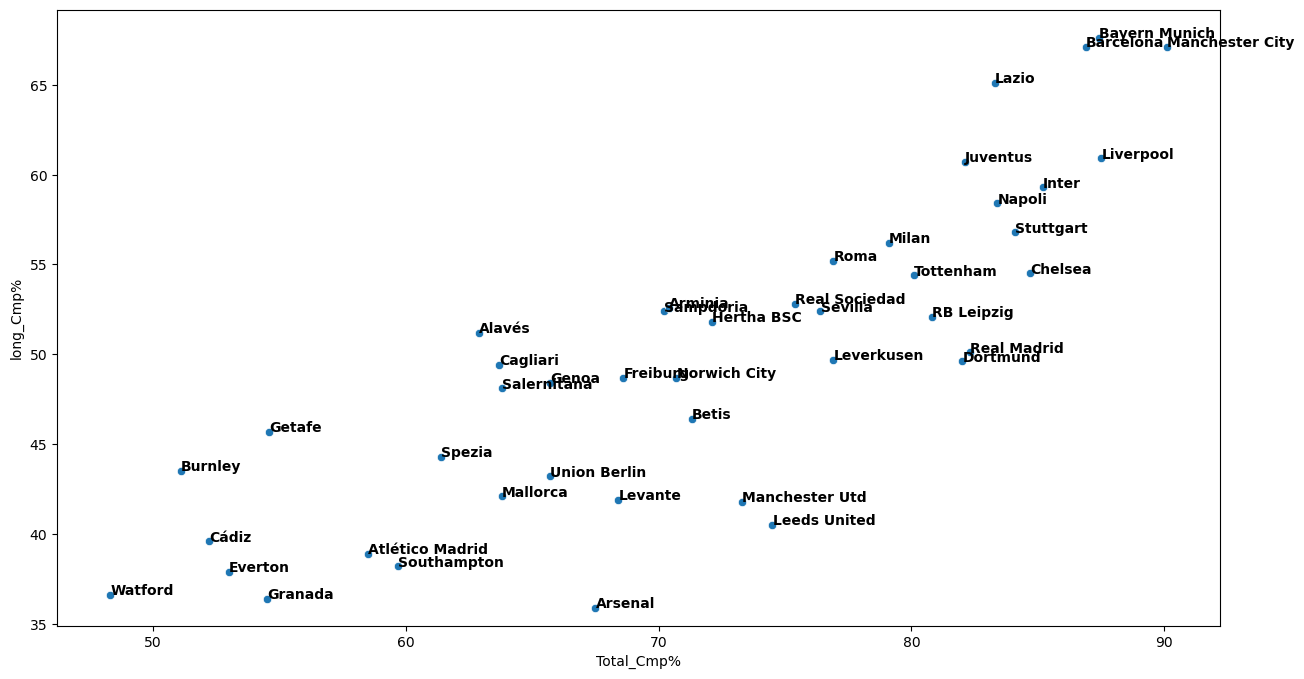

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
scatterplot = sns.scatterplot(data=top_bottom_6, x='Total_Cmp%', y='long_Cmp%', hue_order=['Squad','LgRk'])

# Set the y-axis limits to the minimum value of the data
plt.ylim(bottom=top_bottom_6['long_Cmp%'].min() - 1)

# Annotate the points with squad labels
for line in range(0, top_bottom_6.shape[0]):
    scatterplot.text(top_bottom_6['Total_Cmp%'][line] + 0.01, top_bottom_6['long_Cmp%'][line], 
                     top_bottom_6['Squad'][line], horizontalalignment='left', 
                     size='medium', color='black', weight='semibold')
plt.savefig('Total_Cmp%_long_Cmp%_scatterplot.png', bbox_inches='tight', pad_inches=0.05, dpi=300)
plt.show()


## Check whether top6 and bottom6 clubs are diffrentiate each other

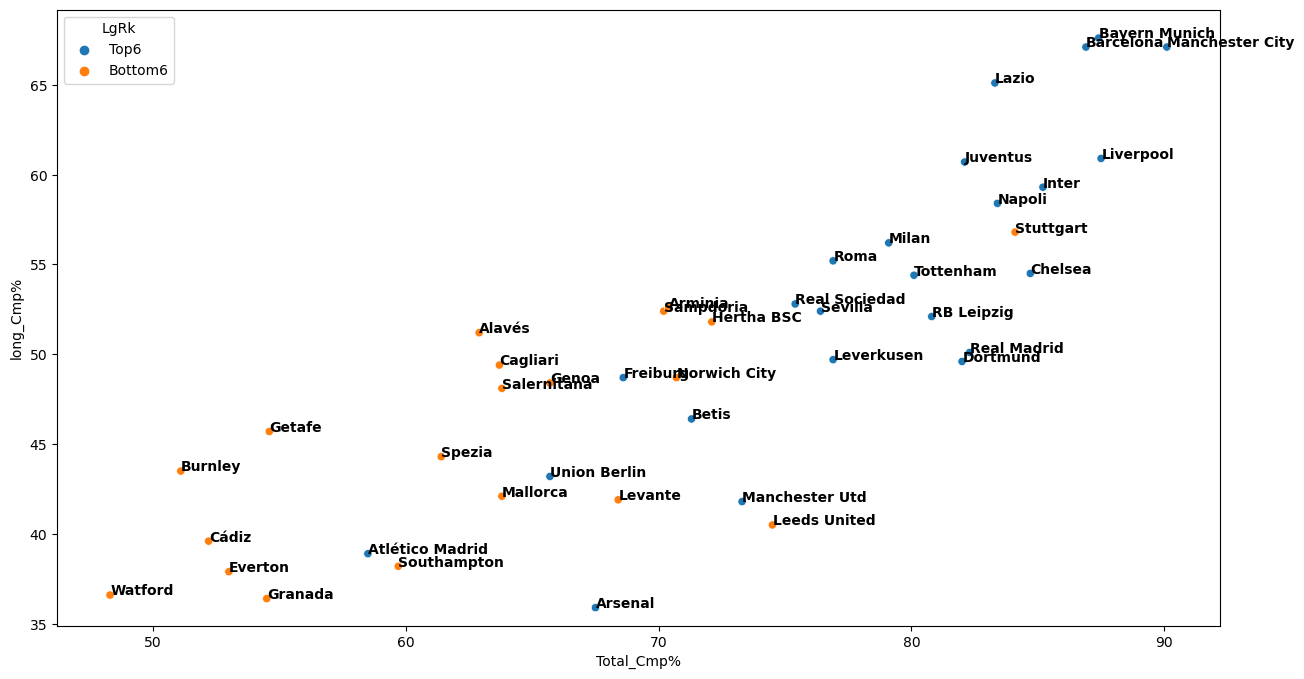

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
scatterplot = sns.scatterplot(data=top_bottom_6, x='Total_Cmp%', y='long_Cmp%', hue='LgRk')

# Set the y-axis limits to the minimum value of the data
plt.ylim(bottom=top_bottom_6['long_Cmp%'].min() - 1)

# Annotate the points with squad labels
for line in range(0, top_bottom_6.shape[0]):
    scatterplot.text(top_bottom_6['Total_Cmp%'][line] + 0.01, top_bottom_6['long_Cmp%'][line], 
                     top_bottom_6['Squad'][line], horizontalalignment='left', 
                     size='medium', color='black', weight='semibold')

plt.show()

- We can see that Top6 and bottom6 club Goalkeepers are diffrentiated each other. But there is a mixup between the points

## Let's add more features
- If we want to include more passing-related features like 'Total_Cmp,' 'Total_Att,' 'Total_Cmp%,' 'TotDist,' 'Total_PrgDist,' 'short_Cmp,' 'short_Att,' 'short_Cmp%,' 'medium_Cmp,' 'medium_Att,' 'medium_Cmp%,' 'long_Cmp,' 'long_Att,' 'long_Cmp%,' and 'PrgP,' it can be quite complex. These variables often show strong connections and duplication because they represent hidden aspects of the data.

## In the Data Science field, a lot of techniques exist for resolving this problem and they go under the name of dimensionality reduction. Among them, the Principal Component Analysis (PCA) is probably the most famous.

# Principal Component Analysis

In [20]:
import numpy as np
from sklearn.decomposition import PCA

# Create or load your dataset
# For this example, let's assume you have a DataFrame named 'df' with numeric columns

# Standardize the data (optional but recommended for PCA)
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame named 'df' with numeric columns
# Extract the numeric data from the DataFrame
numeric_data = top_bottom_6.select_dtypes(include=[np.number])
numeric_data=numeric_data[['Total_Att','Total_Cmp%', 'short_Cmp%','medium_Cmp%', 'long_Cmp%']]
# Standardize the data (mean=0, std=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply PCA
n_components = 2  # Number of principal components to keep
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame to store the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'],index=top_bottom_6['Squad'])  # Update column names accordingly
principal_df

,PC1,PC2
Squad,,
Liverpool,-1.890980,0.890603
Sampdoria,-0.079981,0.294826
Salernitana,0.837040,-1.280118
Sevilla,-0.814557,-0.131676
Levante,0.544072,-0.986736
Real Madrid,-0.824770,-0.598181
Cagliari,1.070794,0.687357
Manchester City,-2.544493,-0.649681
Freiburg,-0.022313,1.350856


In [21]:
# add squad and league position to this data
principal_df=principal_df.reset_index()
x=top_bottom_6[['Squad','LgRk']]
principal_df = pd.merge(principal_df, x, on='Squad',how='left')
principal_df

,Squad,PC1,PC2,LgRk
0,Liverpool,-1.890980,0.890603,Top6
1,Sampdoria,-0.079981,0.294826,Bottom6
2,Salernitana,0.837040,-1.280118,Bottom6
3,Sevilla,-0.814557,-0.131676,Top6
4,Levante,0.544072,-0.986736,Bottom6
5,Real Madrid,-0.824770,-0.598181,Top6
6,Cagliari,1.070794,0.687357,Bottom6
7,Manchester City,-2.544493,-0.649681,Top6
8,Freiburg,-0.022313,1.350856,Top6
9,Southampton,2.043204,-0.164997,Bottom6


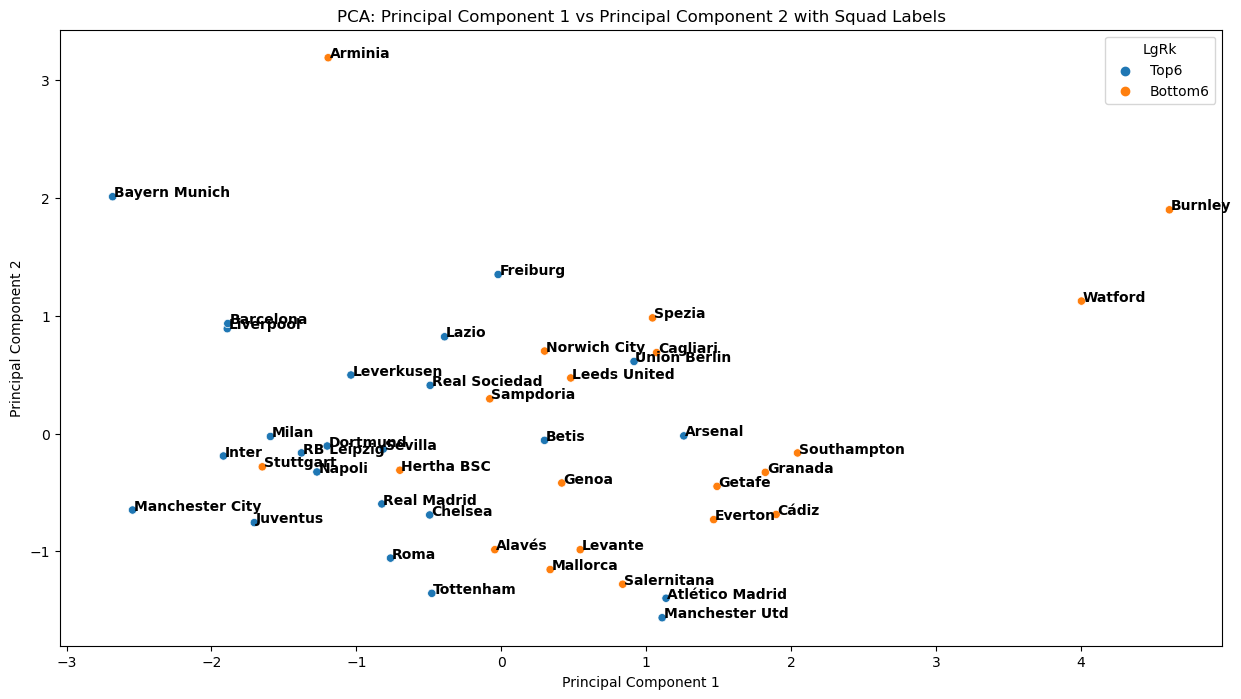

In [22]:
# Create a scatterplot with labels based on 'Squad'
plt.figure(figsize=(15, 8))
scatterplot = sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='LgRk')

# Annotate the points with squad labels
for line in range(0, principal_df.shape[0]):
    scatterplot.text(principal_df['PC1'][line]+0.01, principal_df['PC2'][line], 
                     principal_df['Squad'][line], horizontalalignment='left', 
                     size='medium', color='black', weight='semibold')

plt.title('PCA: Principal Component 1 vs Principal Component 2 with Squad Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('pcascatterplot.png', dpi=300, bbox_inches='tight')
plt.show()


- As you can observe from the graph, The position of Inter Milan goalkeeper Onana is closer to Treble winner Manchester city goalkeeper Ederson. we obtain a clear understanding of how the ball-playing ability of goalkeepers can influence the positions of clubs in the top 6 and bottom 6, ultimately impacting team performance. However, there appears to be a mix-up in the above plot, which we will now investigate.

## Try pca on Principle axis 1

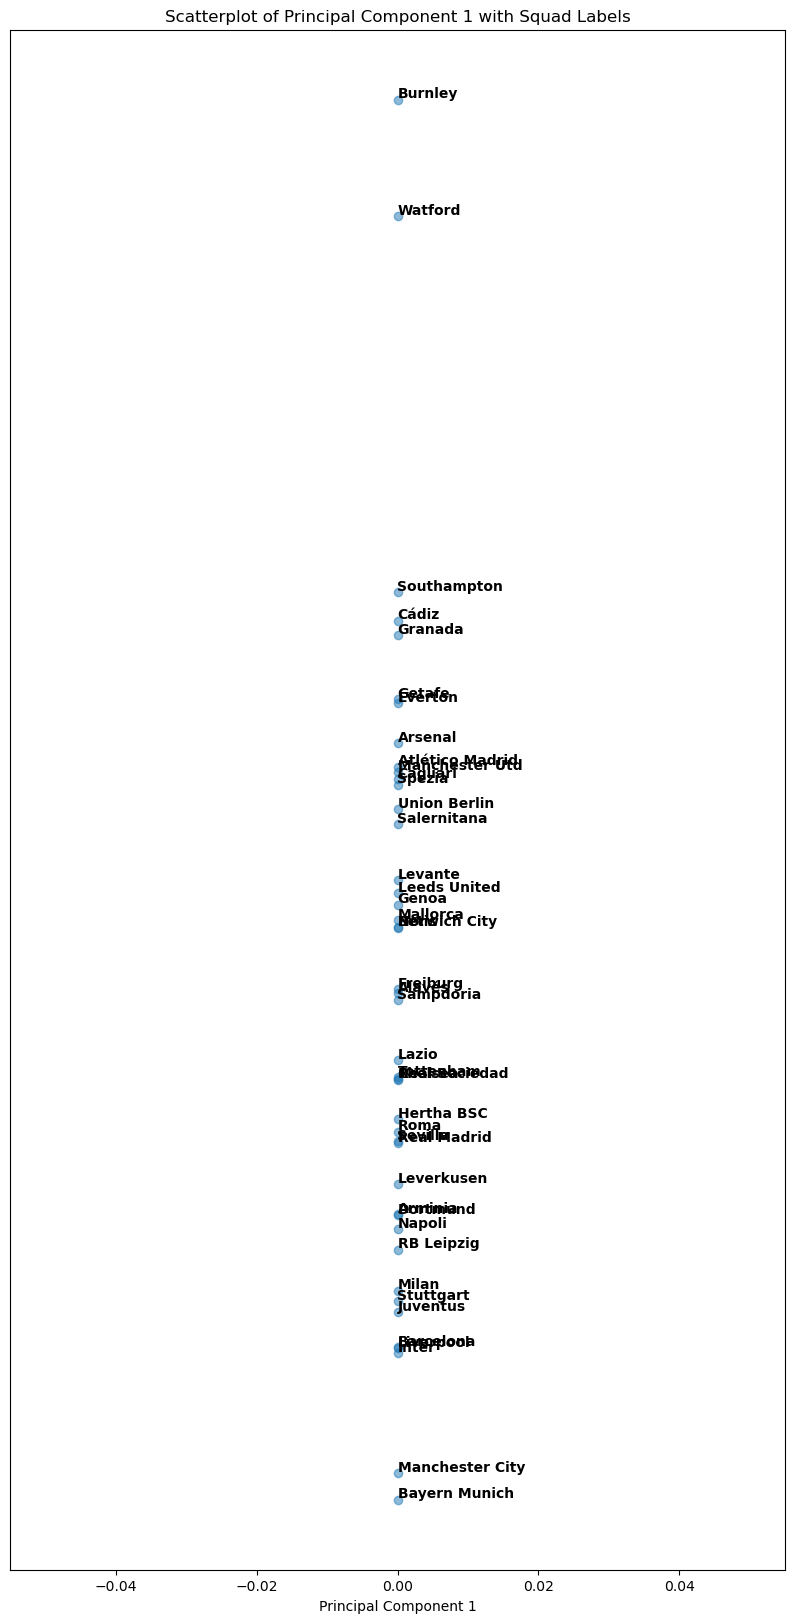

In [23]:
# Create a scatterplot using only PC1
plt.figure(figsize=(10, 20))
scatterplot = plt.scatter(np.zeros_like(principal_df['PC1']),principal_df['PC1'], alpha=0.5)

# Annotate the points with squad labels
for line in range(0, principal_df.shape[0]):
    plt.text( 0,principal_df['PC1'][line]+0.01, 
             principal_df['Squad'][line], horizontalalignment='left', 
             size='medium', color='black', weight='semibold')

plt.title('Scatterplot of Principal Component 1 with Squad Labels')
plt.xlabel('Principal Component 1')
plt.yticks([])  # Remove the y-axis ticks and labels
plt.show()

## K-means clustering
- Now, let's delve into applying K-means clustering to our PCA-transformed dataframe to distinguish between top and bottom clubs based on the ball-playing ability of goalkeepers.

In [24]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Assuming you have a DataFrame named 'principal_df' with columns 'Squad', 'LgRk', 'PC1', and 'PC2'

# Create a mapping between the original 'LgRk' values and cluster labels
cluster_mapping = {
    'Top6': 1,     # Assign a cluster label (e.g., 1) for the 'top6' group
    'Bottom6': 0   # Assign another cluster label (e.g., 0) for the 'bottom6' group
}

# Map the 'LgRk' values to cluster labels
principal_df['Cluster'] = principal_df['LgRk'].map(cluster_mapping)

# Perform k-means clustering with the known number of clusters (2 in this case)
kmeans = KMeans(n_clusters=2, random_state=42)
X = principal_df[['PC1', 'PC2']]
principal_df['PredictedCluster'] = kmeans.fit_predict(X)
principal_df


,Squad,PC1,PC2,LgRk,Cluster,PredictedCluster
0,Liverpool,-1.890980,0.890603,Top6,1,1
1,Sampdoria,-0.079981,0.294826,Bottom6,0,1
2,Salernitana,0.837040,-1.280118,Bottom6,0,0
3,Sevilla,-0.814557,-0.131676,Top6,1,1
4,Levante,0.544072,-0.986736,Bottom6,0,0
5,Real Madrid,-0.824770,-0.598181,Top6,1,1
6,Cagliari,1.070794,0.687357,Bottom6,0,0
7,Manchester City,-2.544493,-0.649681,Top6,1,1
8,Freiburg,-0.022313,1.350856,Top6,1,1
9,Southampton,2.043204,-0.164997,Bottom6,0,0


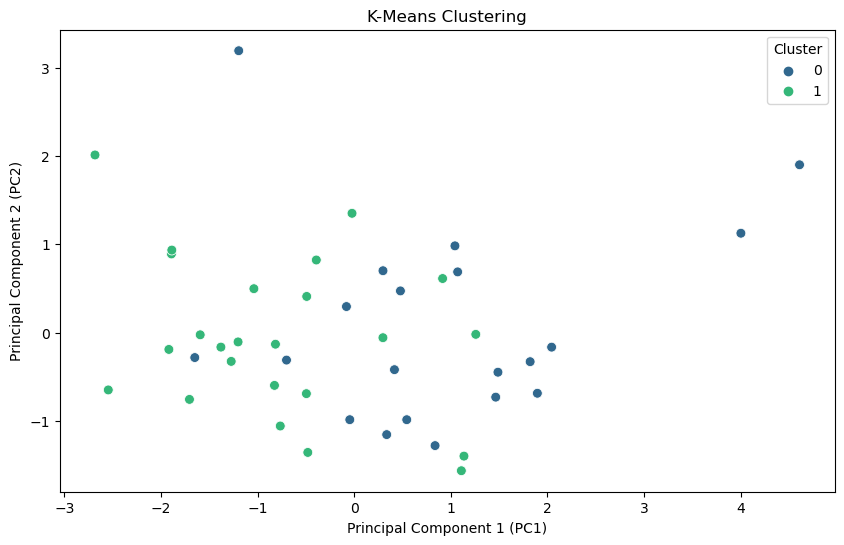

In [25]:
# Create a scatterplot with different colors for each cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=50)

plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('K-Means Clustering')
plt.legend(title='Cluster')
plt.savefig('kmeanscatterplot.png', dpi=300, bbox_inches='tight')
plt.show()

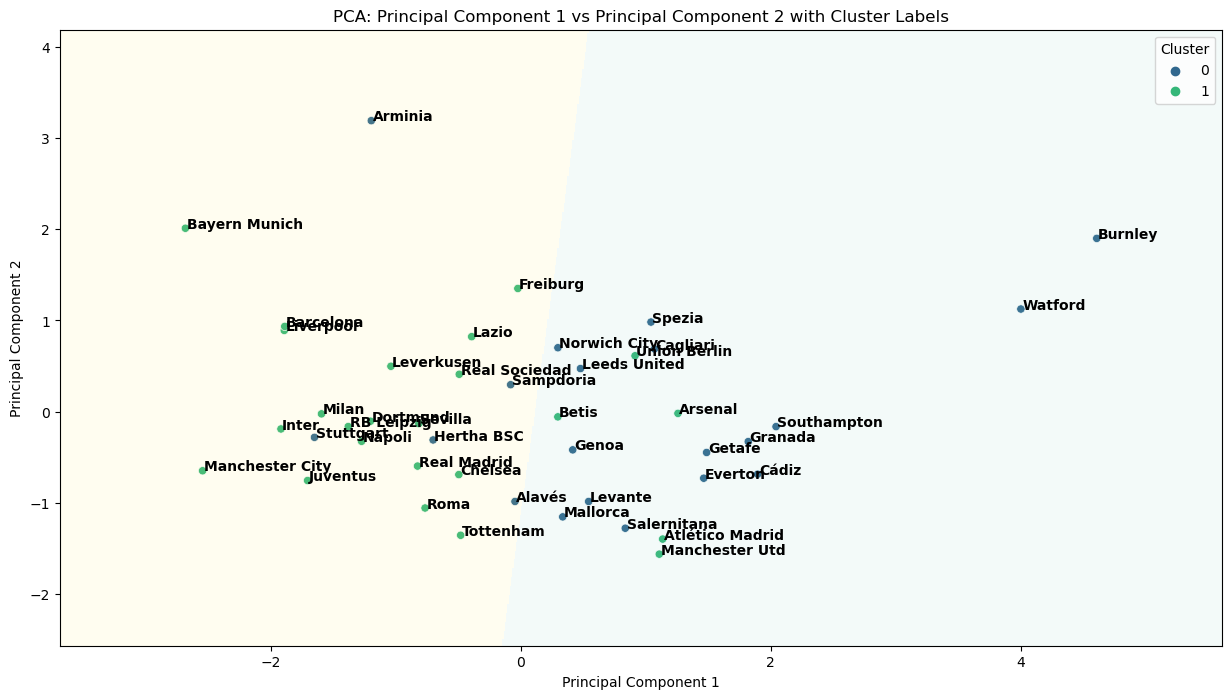

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Step 2: Create a scatterplot with labels based on 'Cluster'
plt.figure(figsize=(15, 8))
scatterplot = sns.scatterplot(x=principal_df['PC1'], y=principal_df['PC2'], hue=principal_df['Cluster'], palette='viridis')

# Step 3: Create a mesh grid for background colors
x_min, x_max = principal_df['PC1'].min() - 1, principal_df['PC1'].max() + 1
y_min, y_max = principal_df['PC2'].min() - 1, principal_df['PC2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 4: Create a ListedColormap for background colors
cmap_background = ListedColormap(sns.color_palette("Set3"))

# Step 5: Plot the background colors using pcolormesh
plt.pcolormesh(xx, yy, Z, cmap=cmap_background, alpha=0.1)

# Step 6: Annotate the points with squad labels
for line in range(0, principal_df.shape[0]):
    scatterplot.text(principal_df['PC1'][line] + 0.01, principal_df['PC2'][line], 
                     principal_df['Squad'][line], horizontalalignment='left', 
                     size='medium', color='black', weight='semibold')

# Step 7: Set plot titles and labels
plt.title('PCA: Principal Component 1 vs Principal Component 2 with Cluster Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# After creating the scatterplot
plt.savefig('scatterplot.png', dpi=300, bbox_inches='tight')

plt.show()


## lets investigate how accurate is this?

In [27]:
# Create a confusion matrix to compare the original 'Cluster' with 'PredictedCluster'
confusion = confusion_matrix(principal_df['Cluster'], principal_df['PredictedCluster'])

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[15  5]
 [ 5 19]]


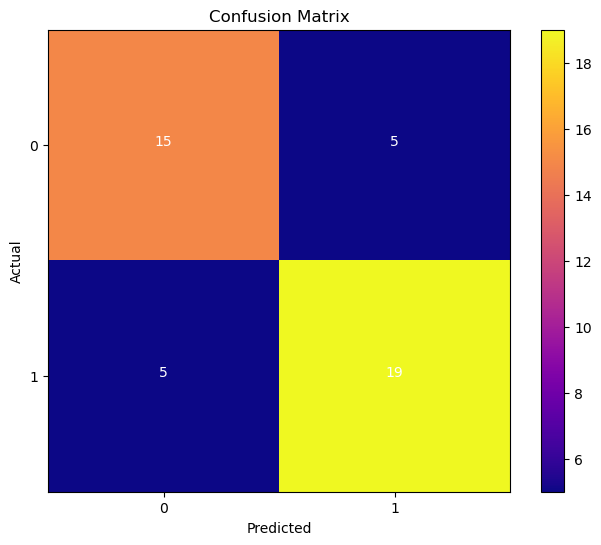

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a confusion matrix 'conf_matrix' (a NumPy array)
# Replace 'conf_matrix' with your actual confusion matrix

# Create a figure
plt.figure(figsize=(8, 6))

# Create a heatmap of the confusion matrix
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.plasma)

# Add labels and annotations
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Optionally, add tick marks and labels for classes
num_classes = len(confusion)
plt.xticks(np.arange(num_classes))
plt.yticks(np.arange(num_classes))

# Loop over data dimensions and create text annotations
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, str(confusion[i, j]), horizontalalignment="center", color="white")

# Save the confusion matrix as an image
plt.savefig('confusion_matrix.png')

# Show the confusion matrix (optional)
plt.show()


### What are the instances of false positives and false negatives in this context?

## False Positives: Goalkeepers from the bottom 6 predicted as top 6 clubs:
- Sampdoria goalkeeper moved from the bottom 6 to Inter, a top 6 club.
- Stuttgart goalkeeper transitioned from the bottom 6 to SC Freiburg, another top 6 club.
- Stefan Ortega of Arminia, previously in the bottom 6, made a surprising move to Manchester City.
- Hertha BSC goalkeeper, previously in the bottom 6, transferred to Union Berlin, a top 6 club.
- Alavés goalkeeper got relegated.

## False Negatives: Goalkeepers from top 6 predicted as bottom 6 clubs:
- Betis goalkeeper, originally part of the bottom 6, remained with Betis (t6).
- Andreas Luthe moved from Union Berlin (top 6) to a second-tier club.
- Athletic Madrid, Arsenal, and Manchester United.

- As evident from the confusion matrix, false positives (where goalkeepers from the bottom 6 were predicted as top 6 clubs) saw these goalkeepers move to top 6 clubs in the subsequent season. Conversely, false negatives (where goalkeepers from the top 6 were predicted as bottom 6 clubs) included instances such as Union Berlin's goalkeeper being sold to a second division club, Manchester United sold David De Gea, and transfer rumors surrounding Arsenal's goalkeeper despite their solid performance last season. One noteworthy outlier is Athletic Madrid's goalkeeper, Jan Oblak. Athletic Madrid, known for their defensive strategy, might explain Oblak's presence on this list.

# conclusion
- It's evident that the extreme version of a modern ball-playing goalkeeper, like Onana, has the potential to make a significant impact on a club's performance. We've seen instances where goalkeepers with exceptional passing abilities have helped their teams achieve top positions in the leagues. Considering this, a move to Manchester United for a goalkeeper of Onana's caliber could be a game-changer for the club, potentially elevating their performance to new heights.